## P9.5.1
-----

C:\Users\Arjun Sarao\AppData\Local\Temp\ipykernel_55048\4132336877.py:22: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df_av = df.xs("av", 1, level=2).mean(axis=1, level=1).dropna(thresh=5)


            Maths   Science   Reading
Maths    1.000000  0.981517  0.958858
Science  0.981517  1.000000  0.979461
Reading  0.958858  0.979461  1.000000


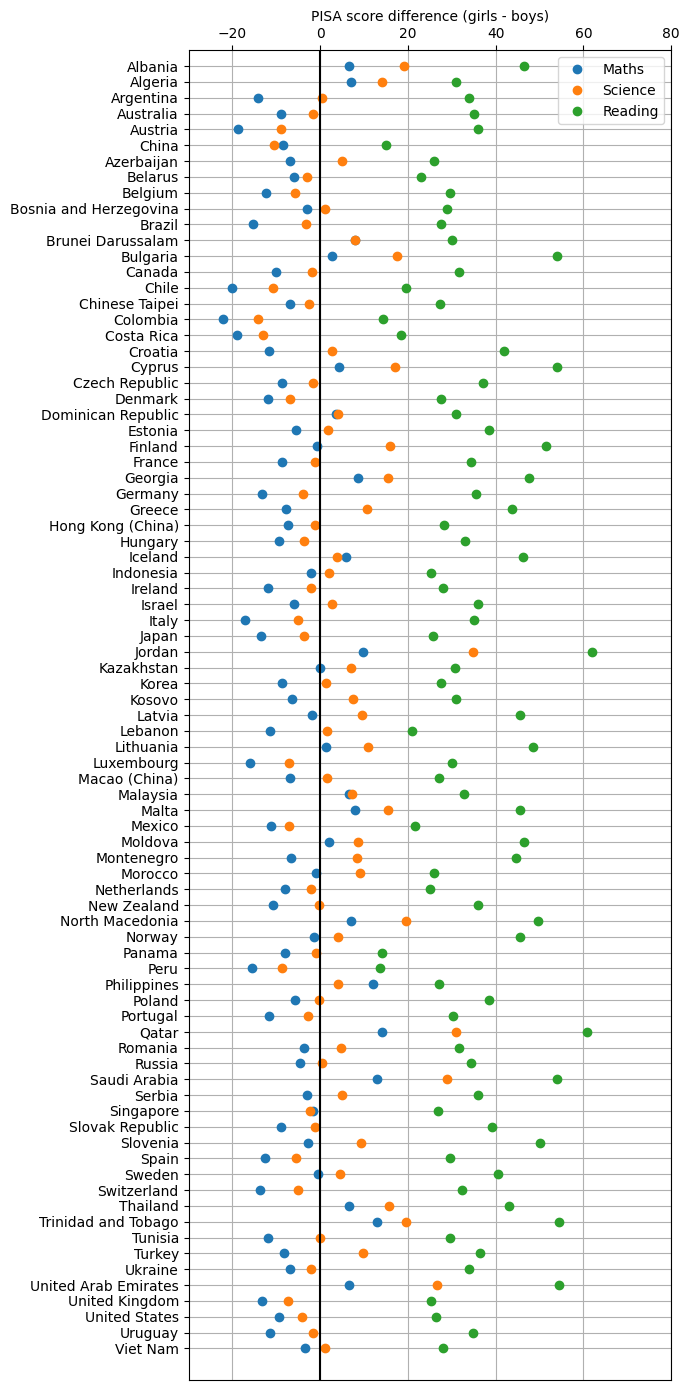

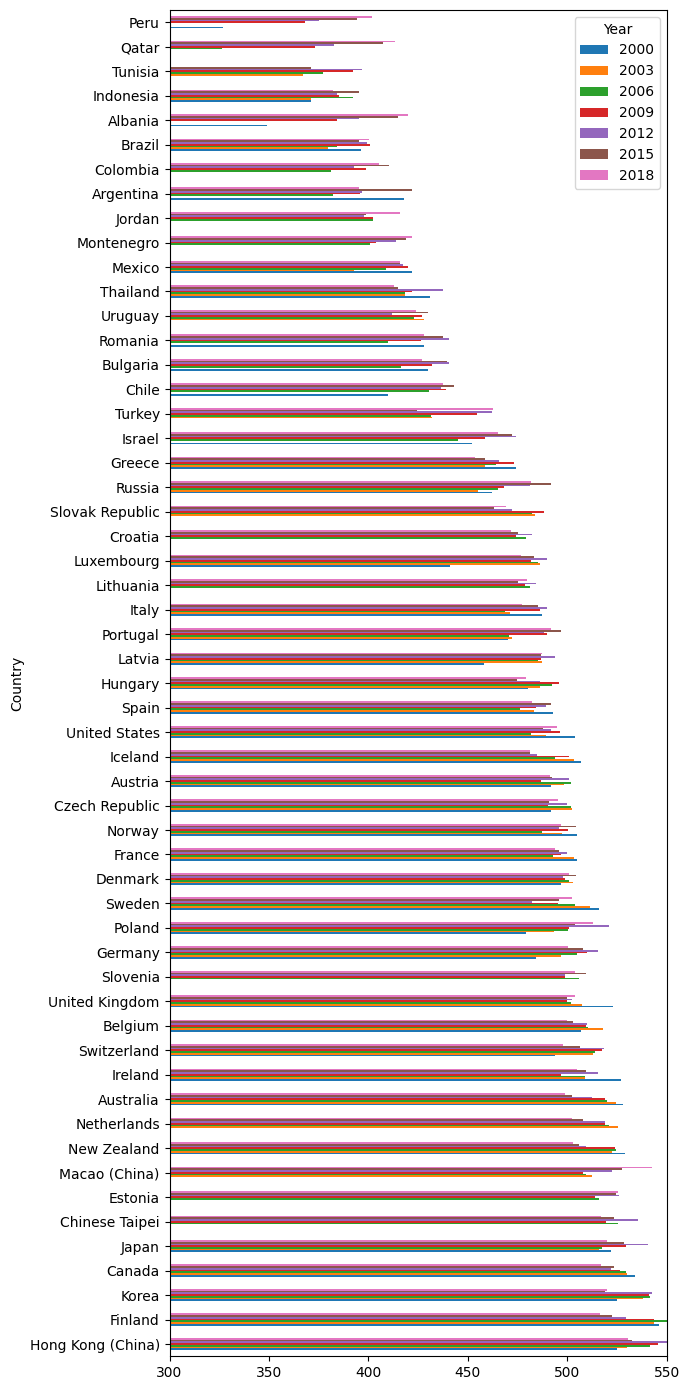

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

subjects = "Maths", "Science", "Reading"

df_d = {}
for subject in subjects:
    df_d[subject] = pd.read_csv(
        filepath_or_buffer=f"C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/PISA-{subject.lower()}.csv",
        header=[0, 1],
        index_col=0,
    )
    df_d[subject].index.name = "Country"
df = pd.concat(df_d, axis=1)
idx = df.columns
df.columns = df.columns.set_levels(
    [idx.levels[0], idx.levels[1].astype(int), idx.levels[2]]
)
df.columns.names = ["Subject", "Year", "Gender"]

df_av = df.xs("av", 1, level=2).mean(axis=1, level=1).dropna(thresh=5)
df_av = df_av[sorted(df_av.columns)]
df_av["mean"] = df_av.mean(axis=1)
df_av.sort_values("mean", inplace=True, ascending=False)

df_gap = pd.DataFrame()
for subject in subjects:
    g = df[subject].groupby("Gender", axis=1)
    m = g.mean()
    df_gap[subject] = m["F"] - m["M"]
df_subjects = pd.DataFrame()
for subject in subjects:
    df_subjects[subject] = df[subject].mean(axis=1)
print(df_subjects.corr())

w, h = 700, 1400
fig, ax = plt.subplots(figsize=(w / 100, h / 100), dpi=100)
ncountries = len(df_gap)
idx = -np.arange(ncountries, dtype=int)
for subject in subjects:
    ax.plot(df_gap[subject].values, idx, "o", label=subject)
ax.set_yticks(idx)
ax.set_yticklabels(df_gap.index)
ax.set_ylim(-ncountries - 1, 1)
ax.set_xlim(-30, 80)
ax.set_xlabel("PISA score difference (girls - boys)")
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
ax.axvline(0, c="k")
ax.legend(loc="upper right")
ax.grid()
plt.tight_layout()

plt.show()

w, h = 700, 1400
fig, ax = plt.subplots(figsize=(w / 100, h / 100), dpi=100)
df_av.iloc(axis=1)[:-1].plot(kind="barh", ax=ax)
ax.set_xlim(300, 550)
plt.tight_layout()

plt.show()


## P9.5.2
-----

In [3]:
import pandas as pd


def to_time_str(time_ms: int) -> str:
    """
    Convert from ms to string in form MM:SS.[MS]
    """
    mins, time_ms = divmod(time_ms, 60000)
    secs = time_ms / 1000
    return "{:02d}:{:6.3f}".format(int(mins), secs)


f1_data = pd.read_csv(
    filepath_or_buffer="C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/f1-data.csv"
)
winners = f1_data[f1_data["Position"] == 1]

g = winners.groupby("Driver")
print("Drivers by number of wins")
print(g["Driver"].count().sort_values(ascending=False))

f1_data["Fastest Lap"] = pd.to_datetime(f1_data["Fastest Lap"], format="%M:%S.%f")

f1_data["Fastest Lap (ms)"] = (
    f1_data["Fastest Lap"].dt.minute * 60000
    + f1_data["Fastest Lap"].dt.second * 1000
    + f1_data["Fastest Lap"].dt.microsecond / 1000
)

g = f1_data[f1_data["Fastest Lap (ms)"].notna()].groupby("Circuit")
tdf = g["Fastest Lap (ms)"].mean().sort_values()

print("Mean fastest lap times by circuit")
for circuit, time in tdf.iteritems():
    print(to_time_str(time), circuit)


Drivers by number of wins
Driver
Michael Schumacher       91
Lewis Hamilton           84
Sebastian Vettel         53
Fernando Alonso          32
Nico Rosberg             23
Damon Hill               22
Ayrton Senna             21
Kimi Räikkönen           21
Mika Häkkinen            20
Nigel Mansell            16
Jenson Button            15
David Coulthard          13
Alain Prost              12
Felipe Massa             11
Jacques Villeneuve       11
Rubens Barrichello       11
Mark Webber               9
Max Verstappen            8
Juan Pablo Montoya        7
Valtteri Bottas           7
Daniel Ricciardo          7
Ralf Schumacher           6
Gerhard Berger            5
Riccardo Patrese          4
Eddie Irvine              4
Johnny Herbert            3
Nelson Piquet             3
Giancarlo Fisichella      3
Heinz-Harald Frentzen     3
Charles Leclerc           2
Jean Alesi                1
Pastor Maldonado          1
Heikki Kovalainen         1
Robert Kubica             1
Jarno Trulli   